# Project Part 2

Name: **Tony Nguyen**

Class: CPSC 322 01

Term: Fall 2023

In [1]:
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

# 1. Introduction

I plan to build a classifier that predicts whether a person’s loan is high risk, medium risk, or low risk for default. The classifier uses two datasets: one is the Credit Risk Analysis on [Kaggle]( https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset?rvi=1) and the Zillow Home Value Index on Zillow’s [home data]( https://www.zillow.com/research/data/). Both datasets will be merged on the zip code. Since housing price trends can impact borrowers' ability to pay their loans, I plan to calculate them and factor them into the classifier training. 

### 1.1 Credit Risk Analysis Dataset
Initially, there were 74 attributes and 887,379 instances. As the file is relatively large, I first ran a pre-processing step, which trims down unnecessary attributes like loan description, loan granted day, and more. After trimming, the dataset is reduced to 34 features. Here are the following attributes:

* **id**: A unique identifier for the loan listing.
* **loan_amnt**: The amount of the loan applied for by the borrower.
* **term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
* **int_rate**: Interest Rate on the loan.
* **installment**: The monthly payment owed by the borrower if the loan originates. Either 36 or 60 months.
* **grade**: Loan grade assigned by the loaner. Possible values are from A-G.
* **emp_length**: Employment length in years. 
* **home_ownership**: The home ownership status provided by the borrower during registration. Possible values are: RENT, OWN, MORTGAGE, OTHER.
* **annual_inc**: The self-reported annual income provided by the borrower.
* **verification_status**: Indicates if the borrower's income was verified by the loaner. Possible values are: Verified, Source Verified, Not Verified.
* **issue_d**: The month-year which the loan was funded. Possible values lay between Jan 2008 - Dec 2015.
* **loan_status**: Current status of the loan.
* **pymnt_plan**: Indicates if a payment plan has been put in place for the loan. Possible values are: y = yes, n = no.
* **zip_code**: The first 3 numbers of the zip code provided by the borrower in the loan application.
* **addr_state**: The state provided by the borrower in the loan application.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **delinq_2yrs**: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
* **earliest_cr_line**: The month-year the borrower's earliest reported credit line was opened.
* **inq_last_6mths**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
* **open_acc**: The number of open credit lines in the borrower's credit file.
* **revol_bal**: Total credit revolving balance.
* **revol_util**:  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* **total_acc**: The total number of credit lines currently in the borrower's credit file.
* **out_prncp**: Remaining outstanding principal for total amount funded.
* **total_pymnt**: Payments received to date for total amount funded.
* **total_rec_prncp**: Principal received to date.
* **total_rec_int**: Interest received to date.
* **total_rec_late_fee**: Late fees received to date.
* **recoveries**: Post charge off gross recovery.
* **collection_recovery_fee**: Post charge off collection fee.
* **last_pymnt_d**: Last month payment was received.
* **last_pymnt_amnt**: Last total payment amount received.
* **next_pymnt_d**: Next scheduled payment date.
* **last_credit_pull_d**: The most recent month the loan company pulled credit for this loan.

In [2]:
credit_original = DataTable(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'])
credit_original.load('dataset/loan_trimmed.csv')
credit_original.rows(range(10))

     id    loan_amnt  term         int_rate    installment  grade    emp_length    home_ownership      annual_inc  verification_status    issue_d    loan_status    pymnt_plan    zip_code    addr_state      dti    delinq_2yrs  earliest_cr_line      inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee  last_pymnt_d      last_pymnt_amnt  next_pymnt_d    last_credit_pull_d
-------  -----------  ---------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  ---------  -------------  ------------  ----------  ------------  -----  -------------  ------------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  --------------  -----------------  ---------

Within the `loan_status` attribute, there are 8 possible values, which are: Charged Off, Current, Default, Fully Paid, In Grace Period, Issued, Late (16-30 days), Late (31-120 days), Does not meet the credit policy. Status: Charge Off and Does not meet the credit policy. Status: Fully Paid. The last two possible values are vague since there is no description of what they meant from the original dataset. With that, I will remove instances with those two values.

In [3]:
while credit_original.get_column_data('loan_status').count('Does not meet the credit policy. Status:Fully Paid') > 0 or credit_original.get_column_data('loan_status').count('Does not meet the credit policy. Status:Charged Off') > 0:
    for i in range(credit_original.row_count()):
        try:
            if (credit_original[i]['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'
                or credit_original[i]['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'):
                del credit_original[i]
        except IndexError:
            break

In [4]:
print('Number of instances: ', credit_original.row_count())

Number of instances:  884630


So, after removing the two attribute values of `loan_status`, the dataset is reduced to 884,630 instances, 2,709 less than the original dataset.

### 1.2 Zillow Home Value Index Dataset
The Zillow Home Value Index dataset contains the median home value index for each zip code in the United States. The dataset contains 294 attributes and 26,369 instances. The first 7 attributes are location details, while the remaining 285 attributes are the median home value index for each month from 2000 to 2023. Here are the following attributes:
* **RegionID**: Unique identifier for the region.
* **SizeRank**: Rank of the region based on median home value index.
* **RegionName**: Zip code.
* **City**: City name.
* **StateName**: State name.
* **Metro**: Metro area name.
* **CountyName**: County name.

For the remaining 285 attributes, the attribute name is the month-year of the median home value index. And since the Credit Risk dataset only contains data from 2008 to 2015, I will remove those attributes that are not within the range from the Zillow dataset. After all, there are 103 attributes left, with 7 of them being location details.

In [5]:
zillow_original = DataTable(["RegionID", "SizeRank", "RegionName", "StateName", "City", "Metro", "CountyName", "Jan 08", "Feb 08", "Mar 08", "Apr 08", "May 08", "Jun 08", "Jul 08", "Aug 08", "Sep 08", "Oct 08", "Nov 08", "Dec 08", "Jan 09", "Feb 09", "Mar 09", "Apr 09", "May 09", "Jun 09", "Jul 09", "Aug 09", "Sep 09", "Oct 09", "Nov 09", "Dec 09", "Jan 10", "Feb 10", "Mar 10", "Apr 10", "May 10", "Jun 10", "Jul 10", "Aug 10", "Sep 10", "Oct 10", "Nov 10", "Dec 10", "Jan 11", "Feb 11", "Mar 11", "Apr 11", "May 11", "Jun 11", "Jul 11", "Aug 11", "Sep 11", "Oct 11", "Nov 11", "Dec 11", "Jan 12", "Feb 12", "Mar 12", "Apr 12", "May 12", "Jun 12", "Jul 12", "Aug 12", "Sep 12", "Oct 12", "Nov 12", "Dec 12", "Jan 13", "Feb 13", "Mar 13", "Apr 13", "May 13", "Jun 13", "Jul 13", "Aug 13", "Sep 13", "Oct 13", "Nov 13", "Dec 13", "Jan 14", "Feb 14", "Mar 14", "Apr 14", "May 14", "Jun 14", "Jul 14", "Aug 14", "Sep 14", "Oct 14", "Nov 14", "Dec 14", "Jan 15", "Feb 15", "Mar 15", "Apr 15", "May 15", "Jun 15", "Jul 15", "Aug 15", "Sep 15", "Oct 15", "Nov 15", "Dec 15"])
zillow_original.load('dataset/zhvi.csv')
zillow_original.rows(range(10))

  RegionID    SizeRank    RegionName  StateName    City          Metro                                  CountyName            Jan 08    Feb 08    Mar 08    Apr 08    May 08    Jun 08    Jul 08    Aug 08    Sep 08    Oct 08    Nov 08    Dec 08    Jan 09    Feb 09    Mar 09    Apr 09    May 09    Jun 09    Jul 09    Aug 09    Sep 09    Oct 09    Nov 09    Dec 09    Jan 10    Feb 10    Mar 10    Apr 10    May 10    Jun 10    Jul 10    Aug 10    Sep 10    Oct 10    Nov 10    Dec 10    Jan 11    Feb 11    Mar 11    Apr 11    May 11    Jun 11    Jul 11    Aug 11    Sep 11    Oct 11    Nov 11    Dec 11    Jan 12    Feb 12    Mar 12    Apr 12    May 12    Jun 12    Jul 12    Aug 12    Sep 12    Oct 12    Nov 12    Dec 12    Jan 13    Feb 13    Mar 13    Apr 13    May 13    Jun 13    Jul 13    Aug 13    Sep 13    Oct 13    Nov 13    Dec 13    Jan 14    Feb 14    Mar 14    Apr 14    May 14    Jun 14    Jul 14    Aug 14    Sep 14    Oct 14    Nov 14    Dec 14    Jan 15    Feb 15    Mar 15    Apr 

### 1.3 Class Label
I will use the `loan_status` attribute as the class label. The class label is a categorical attribute with 6 possible values: Charged Off, Current, Default, Fully Paid, In Grace Period, Issued, Late (16-30 days), Late (31-120 days). I will discretize them into three class: high risk, medium risk, and low risk.

* **High risk, *Denote as 3***: Charged Off, Default, Late (16-30 days), Late (31-120 days).
* **Medium risk, *Denote as 2***: Issued, In Grace Period
* **Low risk, *Denote as 1***: Current, Fully Paid.

The classifier will predict whether a person’s loan is high risk, medium risk, or low risk for default.

## 2. Visualization
### 2.1 Discretized Class Label
I discretize the `loan_status` first to make it easier to visualize the data.

In [6]:
high = 0
medium = 0
low = 0

for i in range(credit_original.row_count()):
    if credit_original[i]['loan_status'] == 'Fully Paid' or credit_original[i]['loan_status'] == 'Current':
        credit_original[i]['loan_status'] = 1
        low += 1
    elif credit_original[i]['loan_status'] == 'Issued' or credit_original[i]['loan_status'] == 'In Grace Period':
        credit_original[i]['loan_status'] = 2
        medium += 1
    elif (credit_original[i]['loan_status'] == 'Late (16-30 days)' or credit_original[i]['loan_status'] == 'Late (31-120 days)'
            or credit_original[i]['loan_status'] == 'Default' or credit_original[i]['loan_status'] == 'Charged Off'):
        credit_original[i]['loan_status'] = 3
        high += 1

In [7]:
print(credit_original.rows(range(10)))

     id    loan_amnt  term         int_rate    installment  grade    emp_length    home_ownership      annual_inc  verification_status    issue_d      loan_status  pymnt_plan    zip_code    addr_state      dti    delinq_2yrs  earliest_cr_line      inq_last_6mths    open_acc    revol_bal    revol_util    total_acc    out_prncp    total_pymnt    total_rec_prncp    total_rec_int    total_rec_late_fee    recoveries    collection_recovery_fee  last_pymnt_d      last_pymnt_amnt  next_pymnt_d    last_credit_pull_d
-------  -----------  ---------  ----------  -------------  -------  ------------  ----------------  ------------  ---------------------  ---------  -------------  ------------  ----------  ------------  -----  -------------  ------------------  ----------------  ----------  -----------  ------------  -----------  -----------  -------------  -----------------  ---------------  --------------------  ------------  -------------------------  --------------  -----------------  ---------

### 2.2 Amount of Different Loan Status
The result below illustrates the total number of different loan risk. This dataset is highly skewed towards low risk loans. This might be a problem as the classifier will be biased towards low risk loans. I will need to be careful when selecting the training and testing sets.

In [8]:
print("Number of High Risk: " + str(high) + ", corresponding to " + str(round(high / credit_original.row_count() * 100, 2)) + "% of the dataset")
print("Number of Medium Risk: " + str(medium) + ", corresponding to " + str(round(medium / credit_original.row_count() * 100, 2)) + "% of the dataset")
print("Number of Low Risk: " + str(low) + ", corresponding to " + str(round(low / credit_original.row_count() * 100, 2)) + "% of the dataset")

Number of High Risk: 60415, corresponding to 6.83% of the dataset
Number of Medium Risk: 14713, corresponding to 1.66% of the dataset
Number of Low Risk: 809502, corresponding to 91.51% of the dataset


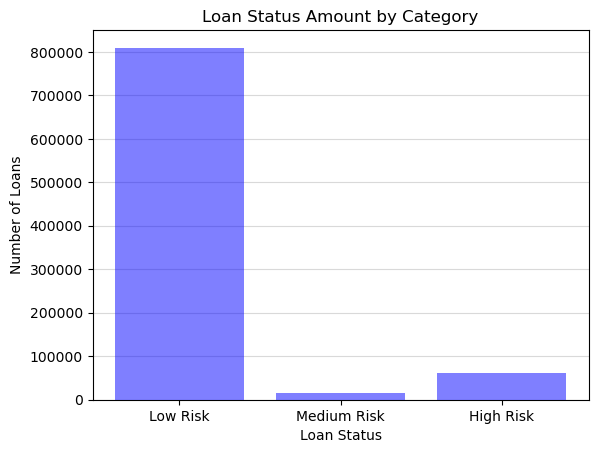

In [9]:
bar_chart([low, medium, high], ['Low Risk', 'Medium Risk', 'High Risk'], 'Loan Status', 'Number of Loans', 'Loan Status Amount by Category')

### 2.3 Loan Amount Distribution

It appears that the loan amount is skewed towards the left. This means that most of the loans are small, between $2,500 and $17,000.

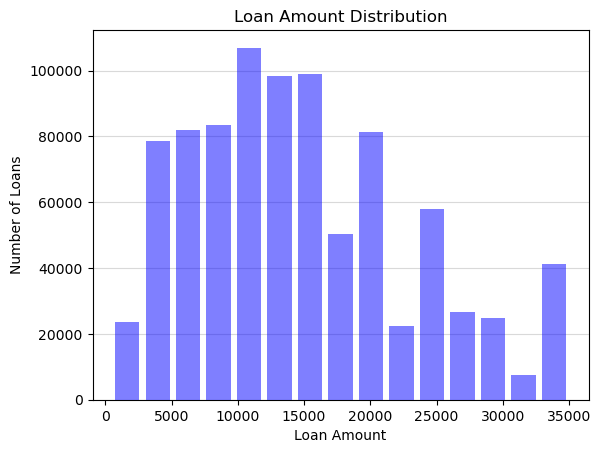

In [10]:
histogram(credit_original, 'loan_amnt', 15, 'Loan Amount', 'Number of Loans', 'Loan Amount Distribution')

### 2.4 Loan Amount Distribution by Loan Status
The distribution of the loan amount by loan status is similar to the overall distribution, with the median values of each loan status being around $13,000 and $15,000.

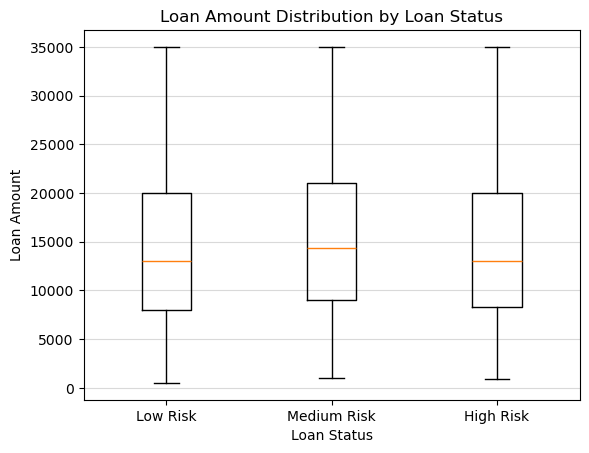

In [11]:
loan_amnt_col = credit_original.get_column_data('loan_amnt')
loan_status_col = credit_original.get_column_data('loan_status')

loan_amnt_low_risk = [loan_amnt_col[i] for i in range(len(loan_amnt_col)) if loan_status_col[i] == 1]
loan_amnt_medium_risk = [loan_amnt_col[i] for i in range(len(loan_amnt_col)) if loan_status_col[i] == 2]
loan_amnt_high_risk = [loan_amnt_col[i] for i in range(len(loan_amnt_col)) if loan_status_col[i] == 3]

box_plot([loan_amnt_low_risk, loan_amnt_medium_risk, loan_amnt_high_risk], ['Low Risk', 'Medium Risk', 'High Risk'], 'Loan Status', 'Loan Amount', 'Loan Amount Distribution by Loan Status')

### 2.5 Loan Amount vs Interest Rate
Most people have an interest rate of around 13-15%, which correspond to the amount of loan around $10,000. This is slightly lower than the median loan amount of $13,000.

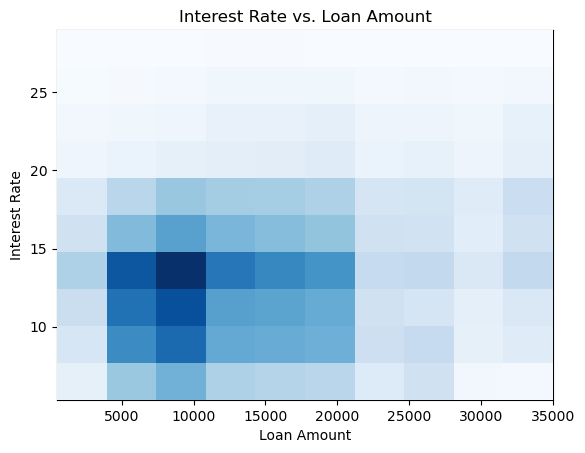

In [12]:
heatmap(credit_original, 'loan_amnt', 'int_rate', 'Loan Amount', 'Interest Rate', 'Interest Rate vs. Loan Amount')

### 2.6 Loan Amount vs Annual Income
The loan amount is heavily skewed towards people who have lower income. This may not be a good indicator for the classifier as the data can be biased.

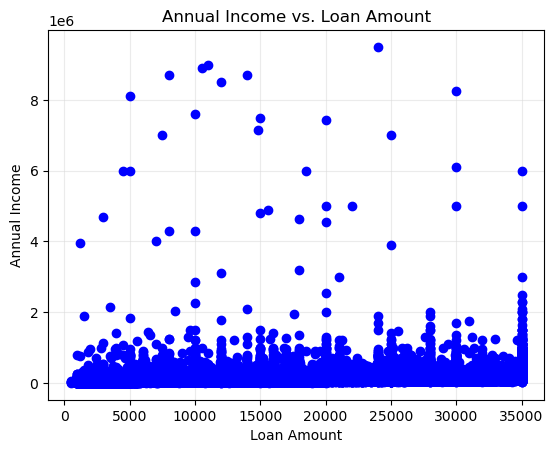

In [13]:
scatter_plot(loan_amnt_col, credit_original.get_column_data('annual_inc'), 'Loan Amount', 'Annual Income', 'Annual Income vs. Loan Amount')

## 3. Training and Feature Selection



* As this dataset is more skewed that I previously thought, I would consider conducting Stratified Cross-Validation to make sure the training and testing sets are representative of the overall dataset.
* I would also consider using the Random Forest classifier as it is more robust to outliers and skewed data.
* Features for training:
    * So far, I have not discovered a strong correlated feature to the class label. I will need to perform more feature selection to determine which features are the most important.
    * There are attributes that need additional cleaning before they can be used for feature selection and model training. I will perform those cleaning steps and hopefully I will have a better understanding of their relationship with the class label to show in Part 3.
    * Until now, I picked the following attributes:
        * `loan_amnt`: This attribute can be used to "bridge" other attributes together. It does affect the interest rate, which in turn affects the loan status.
        * `int_rate`: This attribute is a good indicator of the loan status. The higher the interest rate, the higher the risk of default.
        * `annual_inc`: The higher the annual income, the higher chance people can afford to pay off their loans.
        * `dti`: The lower the debt-to-income ratio, the higher chance people can afford to pay off their loans.
* Types of cleaning:
    * I will discretize `emp_length`, `home_ownership`, and `verification_status` attributes.
    * The month-year attributes are not in a consistent format. I hope that after cleaning and converting them to a consistent format, I can use them to calculate the housing price trends.
    * I will remove the `id` attribute as it is not useful for the classifier.
    * I will perform additional financial calculation to determine how many percent of the loan has been paid off, how many percent of the loan is left, and how many percent of the loan is late, and more.
    * For missing values, I will interpolate them using the mean of the attribute.
    * I will remove the `pymnt_plan` attribute as it is not useful for the classifier.
